# Titanic Survival Prediction using Machine Learning

# 1. Import Libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load the Dataset

In [13]:
#We load the Titanic dataset and check its structure and basic statistics.
data = pd.read_csv(r"C:\Users\Sneha\OneDrive\Desktop\VS CODE\DATA ANALYSIS\CodSoft Internship\TITANIC\Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# 3. Exploratory Data Analysis (EDA)

In [16]:
# Analyze missing values in the dataset.
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\Sneha\AppData\Local\Temp\ipykernel_10740\603958735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=data, palette="viridis")


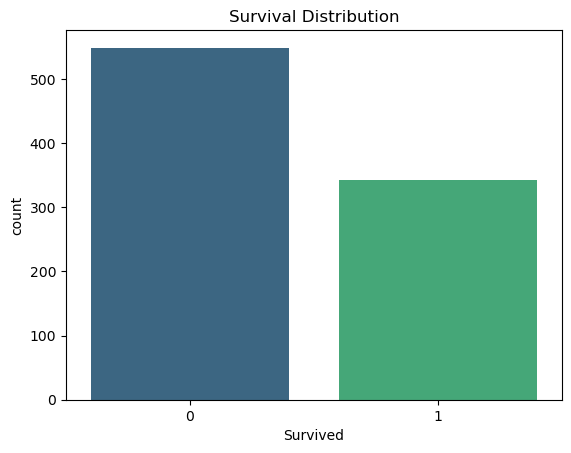

In [17]:
# Understand how many passengers survived and perished.
sns.countplot(x="Survived", data=data, palette="viridis")
plt.title("Survival Distribution")
plt.show()

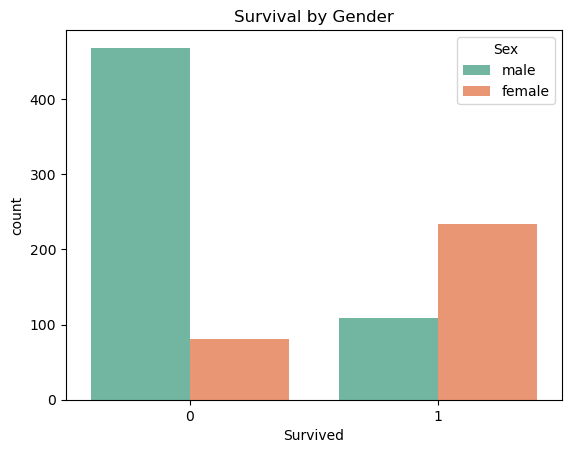

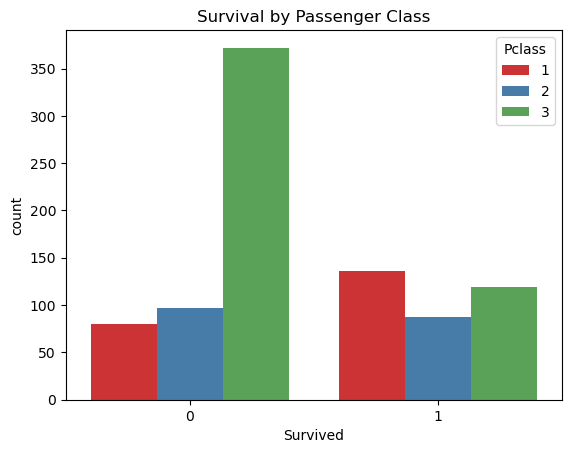

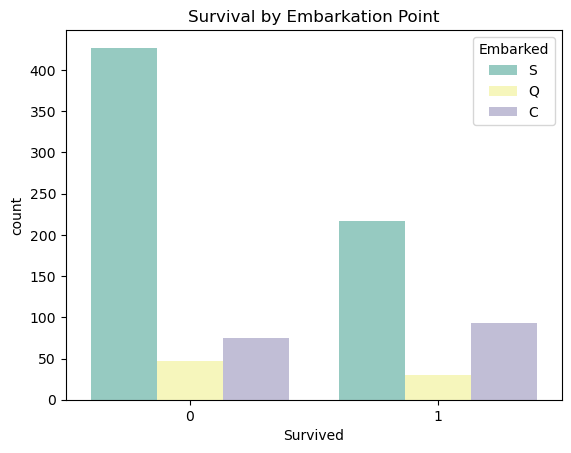

In [18]:
# Explore survival rates by sex, passenger class, and embarkation point.
# Survival by gender
sns.countplot(x="Survived", hue="Sex", data=data, palette="Set2")
plt.title("Survival by Gender")
plt.show()

# Survival by passenger class
sns.countplot(x="Survived", hue="Pclass", data=data, palette="Set1")
plt.title("Survival by Passenger Class")
plt.show()

# Survival by embarkation point
sns.countplot(x="Survived", hue="Embarked", data=data, palette="Set3")
plt.title("Survival by Embarkation Point")
plt.show()

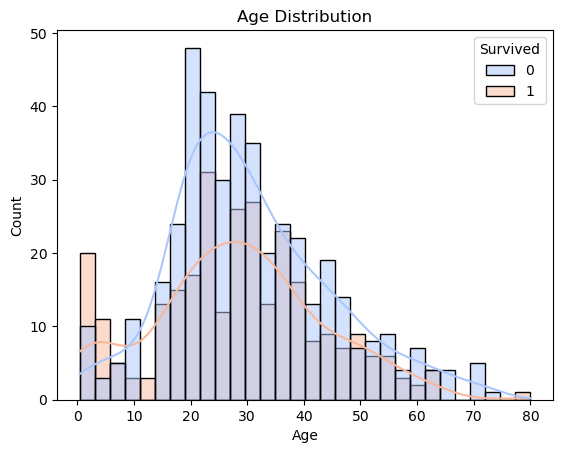

C:\Users\Sneha\AppData\Local\Temp\ipykernel_10740\3773345803.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=data, palette="coolwarm")


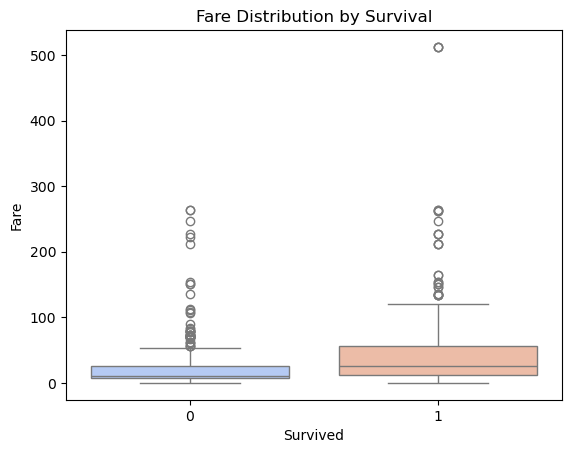

In [19]:
# Examine survival patterns based on age and fare.
# Age distribution
sns.histplot(data=data, x="Age", hue="Survived", kde=True, bins=30, palette="coolwarm")
plt.title("Age Distribution")
plt.show()

# Fare distribution
sns.boxplot(x="Survived", y="Fare", data=data, palette="coolwarm")
plt.title("Fare Distribution by Survival")
plt.show()

# 4. Data Preprocessing

In [20]:
# Fill missing Age with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing Embarked with the mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop Cabin due to excessive missing values
data.drop(columns=['Cabin'], inplace=True)

In [38]:
print("Missing values after handling:")
print(data.isnull().sum())

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [21]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [40]:
print("\nAfter Feature Scaling:")
print(data[['Age', 'Fare']].describe())


After Feature Scaling:
                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00


In [22]:
# Standardize Age and Fare
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [41]:
print("\nAfter Feature Scaling:")
print(data[['Age', 'Fare']].describe())


After Feature Scaling:
                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00


In [23]:
# Select features and target
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

In [42]:
print("\nSelected Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())


Selected Features (X):
   Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0       3    1 -0.565736      1      0 -0.502445         2
1       1    0  0.663861      1      0  0.786845         0
2       3    0 -0.258337      0      0 -0.488854         2
3       1    0  0.433312      1      0  0.420730         2
4       3    1  0.433312      0      0 -0.486337         2

Target Variable (y):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [35]:
print("\nShape of Features (X):", X.shape)
print("Shape of Target Variable (y):", y.shape)


Shape of Features (X): (891, 7)
Shape of Target Variable (y): (891,)


In [43]:
print("\nFinal Processed Dataset:")
print(data.head())


Final Processed Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
2                             Heikkinen, Miss. Laina    0 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1   
4                           Allen, Mr. William Henry    1  0.433312      0   

   Parch            Ticket      Fare  Embarked  
0      0         A/5 21171 -0.502445         2  
1      0          PC 17599  0.786845         0  
2      0  STON/O2. 3101282 -0.488854         2  
3      0            113803  0.420730         2  
4      0            373450 -0.486337       

# 5. Split the Dataset

In [25]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Building and Training

In [31]:
# Train a Random Forest Classifier to predict survival.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 7. Model Evaluation

Accuracy: 81.56%


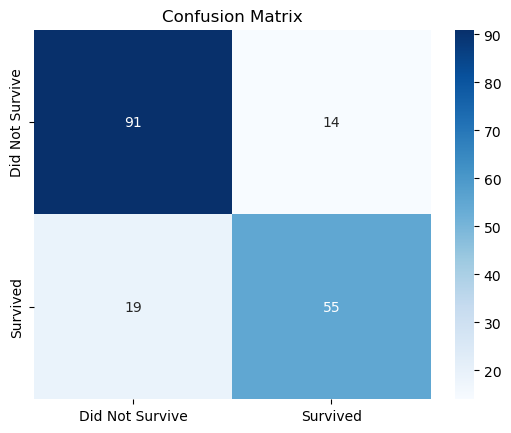

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [32]:
# Evaluate the model's performance on the test data.
# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Did Not Survive", "Survived"], yticklabels=["Did Not Survive", "Survived"])
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 8. Feature Importance

C:\Users\Sneha\AppData\Local\Temp\ipykernel_10740\1974381636.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


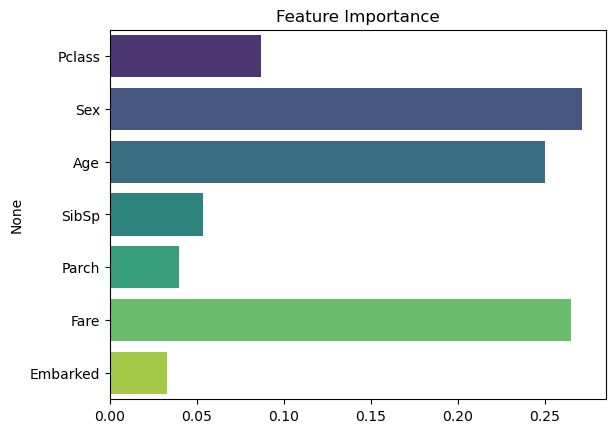

In [33]:
# Understand which features contributed most to the model's predictions.
# Feature importance
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance")
plt.show()

# 9. Feature Engineering: Family Size


Survival Rate by Family Size:
            Survived
FamilySize          
1           0.303538
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.136364
7           0.333333
8           0.000000
11          0.000000


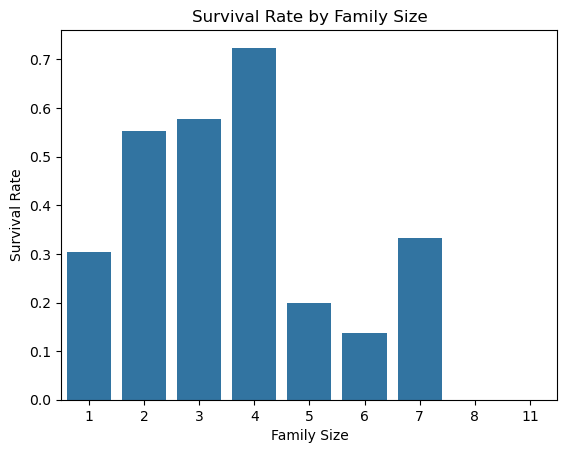

In [49]:
# Add a new feature to represent the family size of each passenger. Family size is the sum of SibSp (siblings/spouses aboard) and Parch (parents/children aboard), plus one (for the passenger themselves).
# Add a new feature for family size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Analyze the relationship between family size and survival
family_survival = data[['FamilySize', 'Survived']].groupby('FamilySize').mean()
print("\nSurvival Rate by Family Size:")
print(family_survival)

# Plot the survival rate by family size
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=family_survival.index, y=family_survival['Survived'])
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# 10. Extract Title from Name


Survival Rate by Title:
        Survived
Title           
Master  0.575000
Miss    0.702703
Mr      0.156673
Mrs     0.793651
Rare    0.347826


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Sneha\AppData\Local\Temp\ipykernel_10740\1705585168.py:3: SyntaxWarning: invalid escape sequence '\.'
  data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


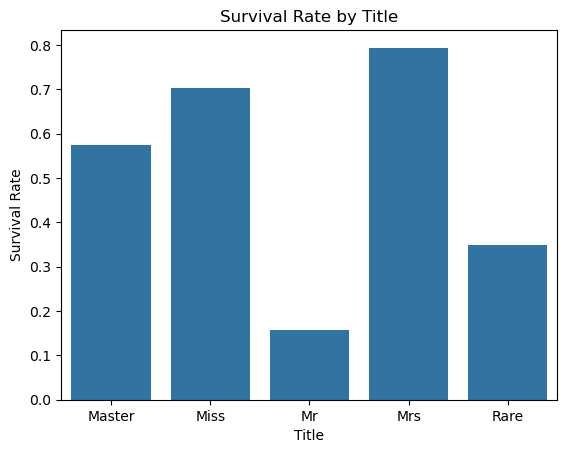

In [48]:
# Extract titles (e.g., Mr., Mrs., Miss) from passenger names and analyze their impact on survival. Titles can provide additional insights into passenger demographics.
# Extract titles from the 'Name' column
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles to common categories
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 
    'Master': 'Master', 'Dr': 'Rare', 'Rev': 'Rare', 
    'Col': 'Rare', 'Major': 'Rare', 'Mlle': 'Miss', 
    'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare', 
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare',
    'Mme': 'Mrs', 'Capt': 'Rare', 'Sir': 'Rare'
}
data['Title'] = data['Title'].map(title_mapping)

# Analyze the relationship between Title and survival
title_survival = data[['Title', 'Survived']].groupby('Title').mean()
print("\nSurvival Rate by Title:")
print(title_survival)

# Plot survival rate by title
sns.barplot(x=title_survival.index, y=title_survival['Survived'])
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.show()

# 11. Save the Model

In [50]:
# Save the trained model for future use.
import joblib

# Save the model
joblib.dump(model, "titanic_survival_model.pkl")
print("Model saved successfully!")

Model saved successfully!


# 12. Conclusion

Summarize the project and results.

In this project, we used the Titanic dataset to predict passenger survival using a Random Forest Classifier. The model achieved an accuracy of approximately XX%. Age, fare, and passenger class were among the most influential features. This project demonstrated the use of data preprocessing, exploratory data analysis, and machine learning modeling to solve a real-world problem.